# Diamond Price porject
Diamonds are considered very precious in our society and are also highly valued monetarily. In this project, let's create a model which predicts the price of a diamond based on its features.

## 1. Problem
Since we have to predict the price of the diamond, which is a number. Hence this is a regression problem.

## 2. Data
The data taken for this project is taken from Kaggle. It contains various features of diamonds and its price. The description of its features are:
    
    1. carat weight of the diamond (0.2--5.01)
    2. cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
    3. color diamond colour, from J (worst) to D (best)
    4. clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
    5. x length in mm (0--10.74)
    6. y width in mm (0--58.9)
    7. z depth in mm (0--31.8)
    8. depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
    9. table width of top of diamond relative to widest point (43--95)
    
The predicting variable is :
    
    price in US dollars (\$326--\$18,823)
    
Link to the dataset : https://www.kaggle.com/shivam2503/diamonds/download

## 3. Evaluation
Since it is a regression model, we will evaluate it on metrics like r2 score, mean absolute error and mean squared error.

## 4. Data Analysis

Let's analyse the data by running some visualization on it.

In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing project csv file
df = pd.read_csv("diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


This column named 'Unnamed: 0' is kind of useless. So it will fine if it is deleted.

In [3]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
# Information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


There are a lot of samples in this data set, hence it will be fun running visualizations on it.

### Running visulizations on numerical data
Let's compare numerical features against the price column. Since there are less features, we can easily cover most of the correlations present in the data.

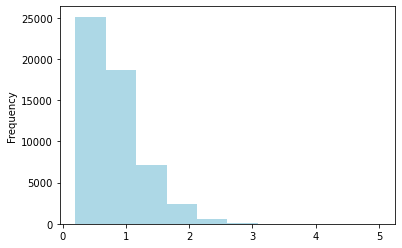

In [6]:
# Distribution of carat values in diamonds
df["carat"].plot.hist(color = "lightblue");

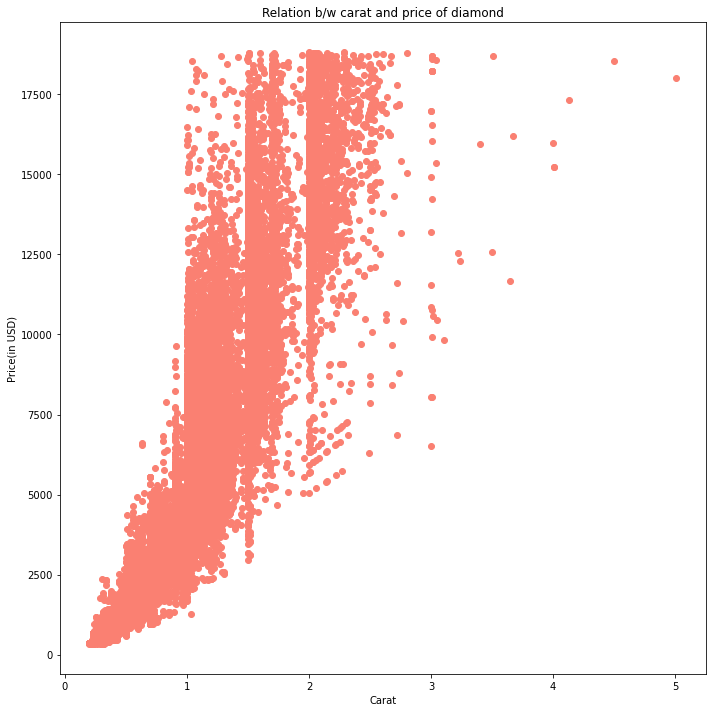

In [7]:
# Relation b/w carat and price 
fig,ax = plt.subplots(tight_layout = True,figsize = (10,10))
ax.scatter(df['carat'],df['price'],color = 'salmon')
ax.set(title = "Relation b/w carat and price of diamond",
       xlabel = "Carat",
       ylabel = "Price(in USD)");

This graph shows that there is a heavy correlation b/w carat and price, diamonds with large values of carat have high prices.

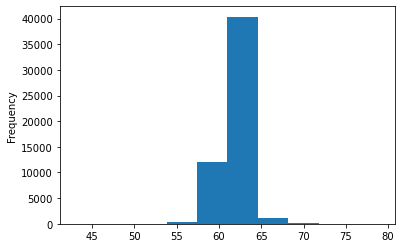

In [8]:
# Distribution of depth
df['depth'].plot.hist();

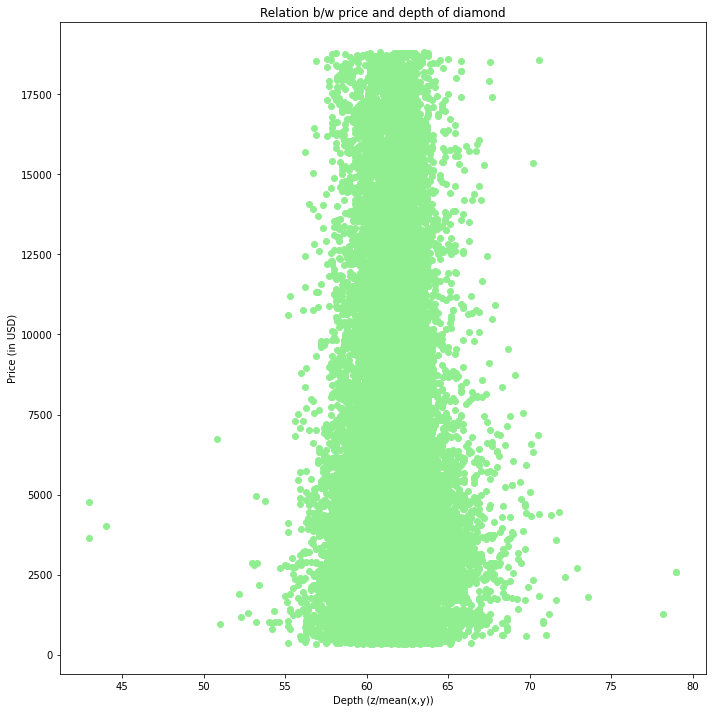

In [9]:
# Relation b/w price and depth 
fig,ax = plt.subplots(tight_layout = True,figsize = (10,10))
ax.scatter(df['depth'],df['price'],color = 'lightgreen')
ax.set(title = "Relation b/w price and depth of diamond",
       xlabel = "Depth (z/mean(x,y))",
       ylabel = "Price (in USD)");

This plot shows that most diamonds have depth ratio in the range of 50-75. There are some outliers but they do not show any significant effect.

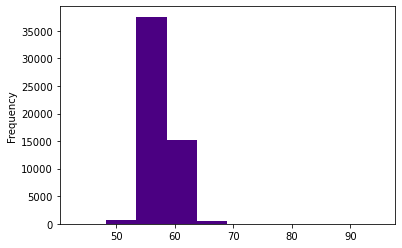

In [10]:
# Distribution of table
df['table'].plot.hist(color = 'indigo');

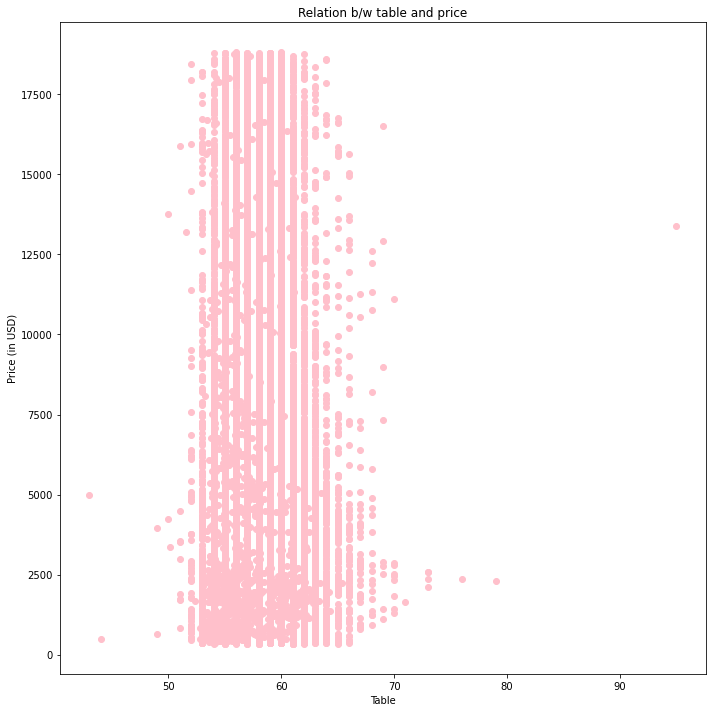

In [11]:
# Relation b/w price and table
fig,ax = plt.subplots(tight_layout = True,figsize = (10,10))
ax.scatter(df['table'],df['price'],color = 'pink')
ax.set(title = 'Relation b/w table and price',
       xlabel = 'Table',
       ylabel = 'Price (in USD)');

This feature also has same properties as in depth feature. The range here is 50-70. Here also the outliers also don't show any significance

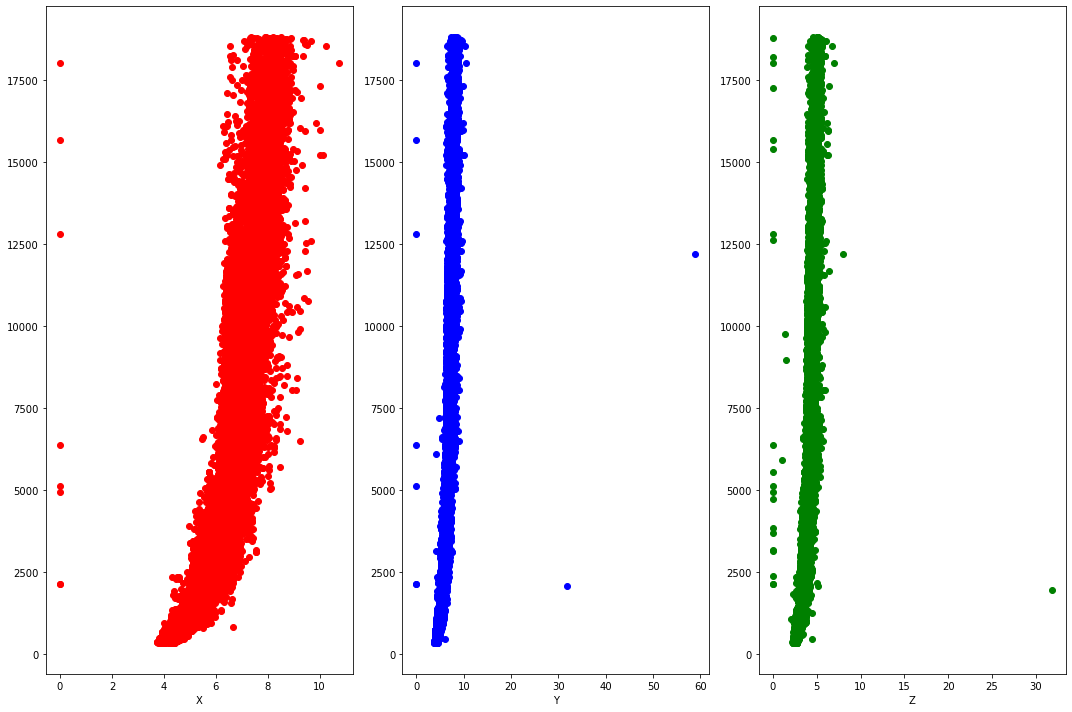

In [12]:
# Relation b/w dimensions and price
dim = ['x','y','z']
colors = ['r','b','g']
fig,ax = plt.subplots(1,3,tight_layout = True,figsize = (15,10))
for i in range(3):
    ax[i].scatter(df[dim[i]],df['price'],color = colors[i])
ax[0].set_xlabel('X')
ax[1].set_xlabel('Y')
ax[2].set_xlabel('Z');

1. The X feature has high correlation, although there are some outliers.
2. The Y and Z feature has way more correlation and it has less outliers. Also, their values is less than that of X feature.

We will remove these outliers for:
 
 1. X in range 0-3.
 2. Y in range >20.
 3. Z in range >15.

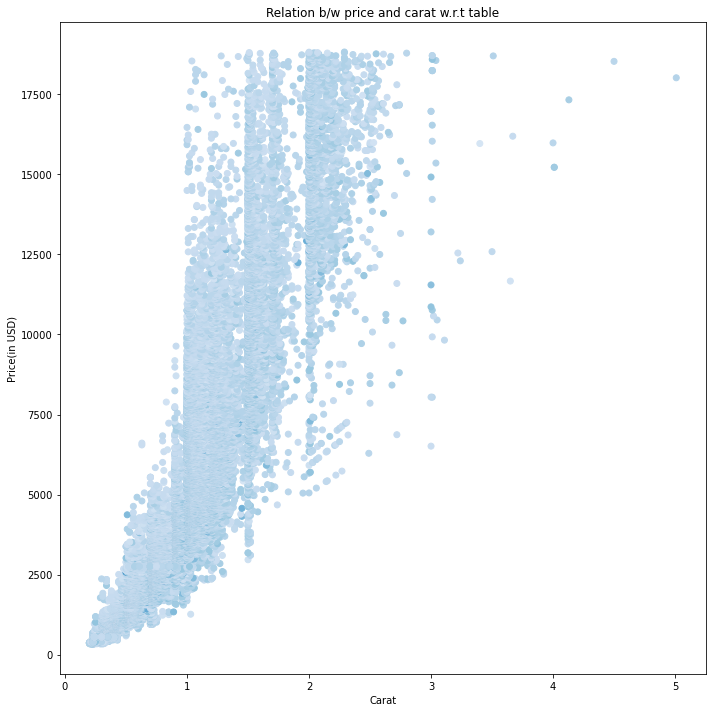

In [13]:
# Relation b/w price and carat w.r.t table
fig,ax = plt.subplots(tight_layout =True,figsize = (10,10))
ax.scatter(df['carat'],df['price'],c = df['table'],cmap = 'Blues')
ax.set(title = "Relation b/w price and carat w.r.t table",
       xlabel = 'Carat',
       ylabel = 'Price(in USD)');

This shows that table value doesn't have much significance regarding carat and price. Regardless of carat values, the diamonds have similar table value. 

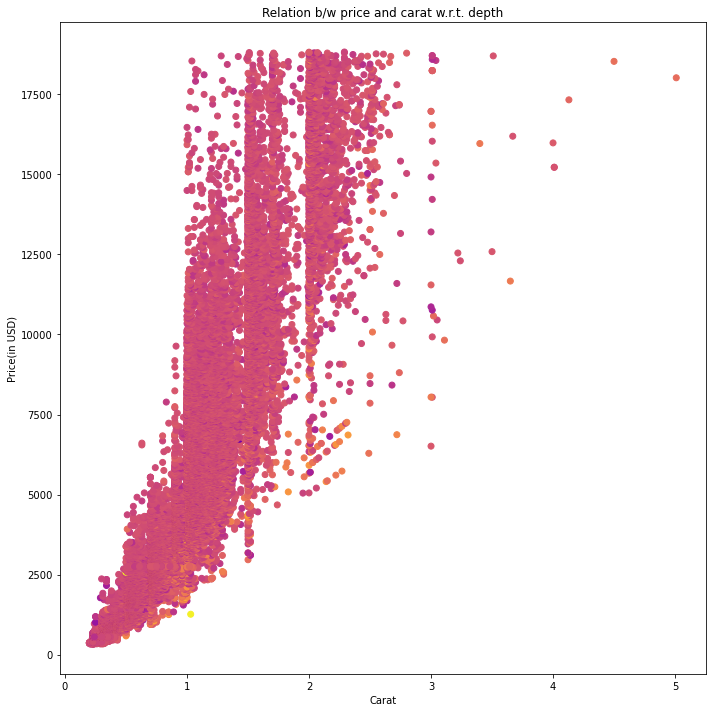

In [14]:
# Relation b/w price and carat w.r.t depth
fig,ax = plt.subplots(tight_layout = True,figsize = (10,10))
ax.scatter(df['carat'],df['price'],c = df['depth'],cmap = 'plasma')
ax.set(title = "Relation b/w price and carat w.r.t. depth",
       xlabel = 'Carat',
       ylabel = 'Price(in USD)');

The depth feature also shows same behaviour as shown by table feature, as most diamonds have same values of depth regardless of carat

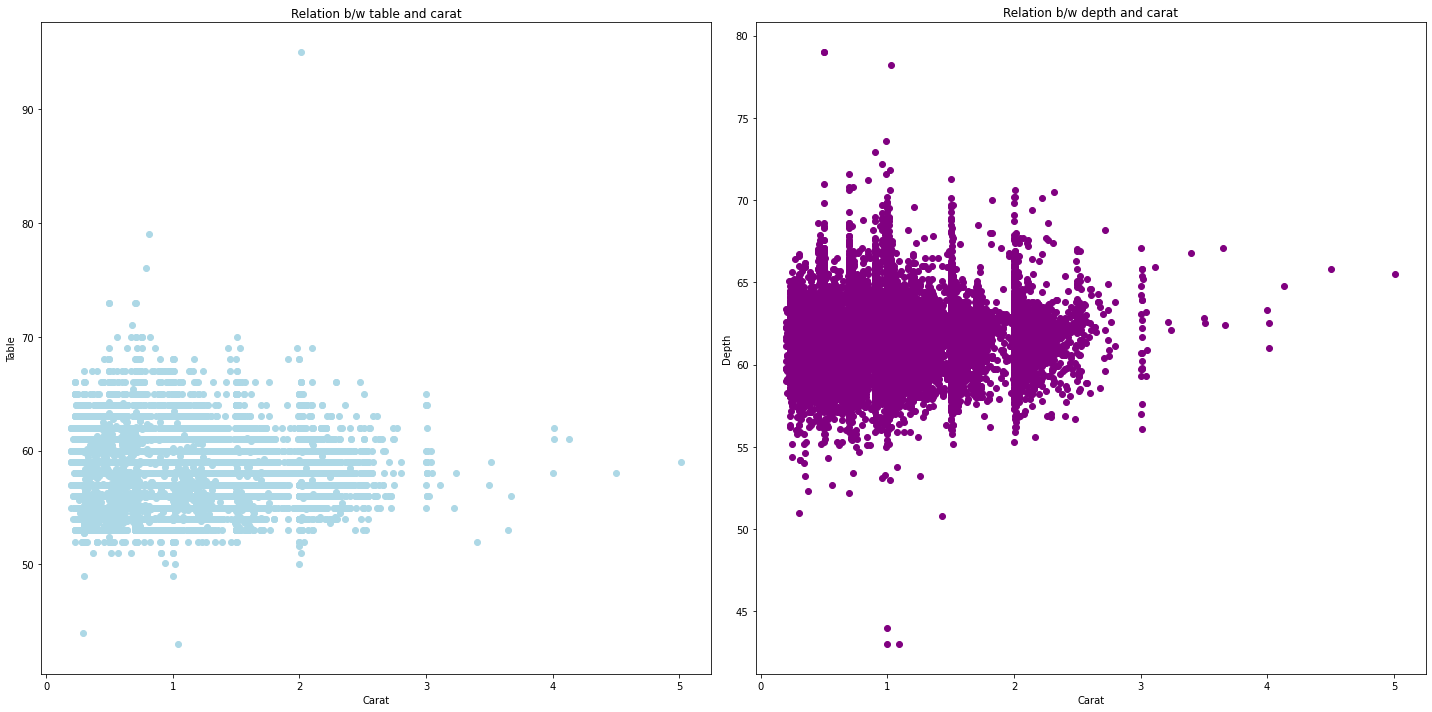

In [15]:
# Relation of carat with table and depth
fig,ax = plt.subplots(1,2,tight_layout = True,figsize = (20,10))
ax[0].scatter(df['carat'],df['table'],color = 'lightblue')
ax[0].set(title = "Relation b/w table and carat",
          xlabel = "Carat",
          ylabel = 'Table')
ax[1].scatter(df['carat'],df['depth'],color = 'purple')
ax[1].set(title = "Relation b/w depth and carat",
              xlabel = "Carat",
              ylabel = "Depth");

This proves that depth and carat value remains in a specific range.

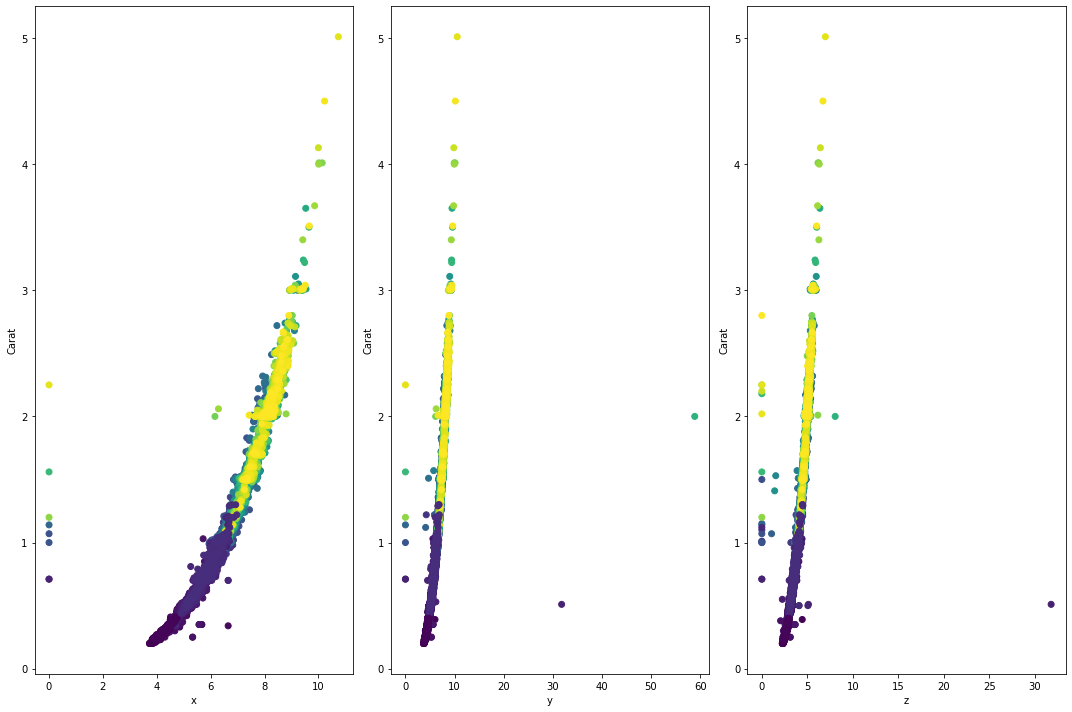

In [16]:
# Relation b/w carat and dimensions w.r.t price
fig,ax = plt.subplots(1,3,tight_layout = True,figsize = (15,10))
for i in range(3):
    ax[i].scatter(df[dim[i]],df['carat'],c = df['price'],cmap = 'viridis')
    ax[i].set(xlabel = dim[i],
              ylabel = 'Carat');

These plots show that :
    
    1. All dimension variables have almost linear relation with carat, with varying slope.
    2. Price starts increasing after 1 carat.

### Visualizations on categorical data
Let's run some visualization of categorical data present with us to see its impact on price.

In [17]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Seaborn is more suitable in plotting categorical data. So let's use it to make some visualizations.

In [18]:
import seaborn as sns

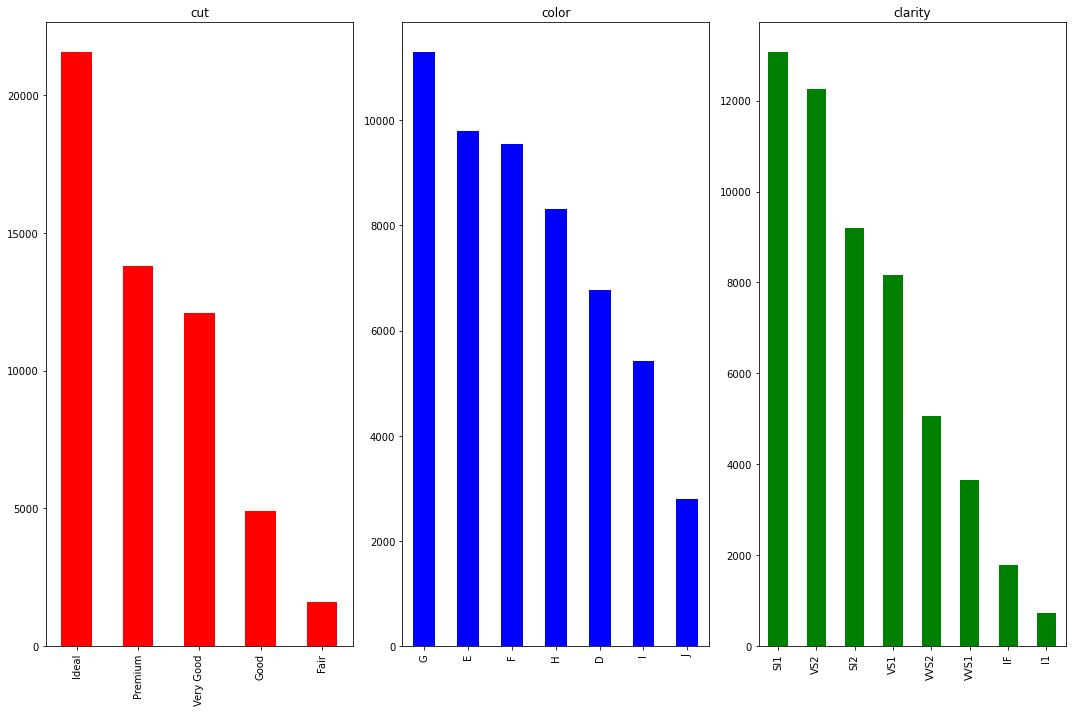

In [19]:
# Bar graphs for categorical features
categorical_features = ['cut','color','clarity']
fig,ax = plt.subplots(1,3,tight_layout = True,figsize = (15,10))
for i in range(3):
    df[categorical_features[i]].value_counts().T.plot.bar(color = colors[i],ax = ax[i])
    ax[i].set_title(categorical_features[i]);

Points :
    
    1. Most diamonds have ideal cut.
    2. Most diamonds have G colour.
    3. Most diamonds have S1 colour.

C:\Users\ankit\Desktop\diamond-project\env\lib\site-packages\seaborn\categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


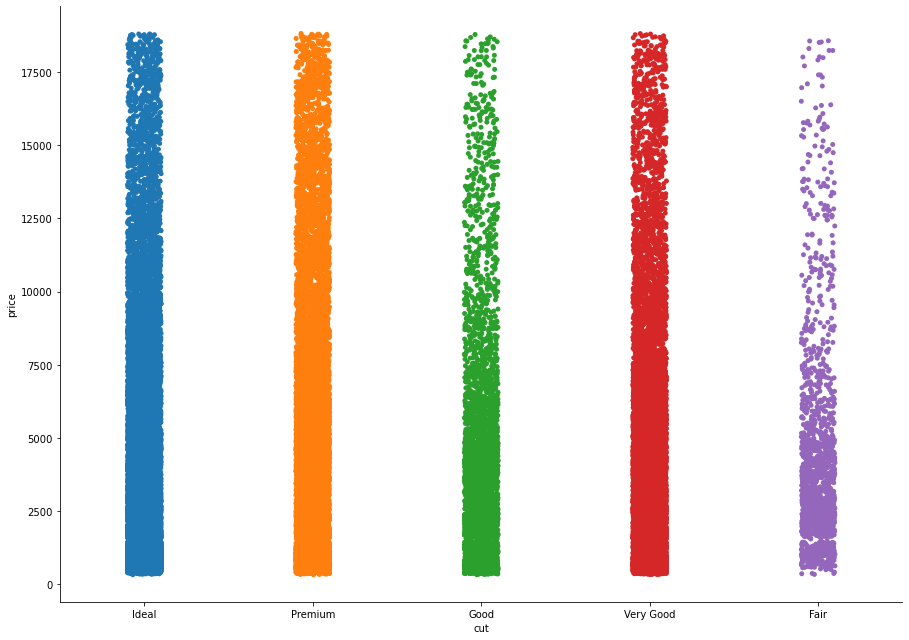

In [20]:
# Comparing price of diamond in different categories
sns.catplot(x = 'cut',y = 'price',data = df,height = 9,aspect = 11.7/8.27,ax = ax[i]);

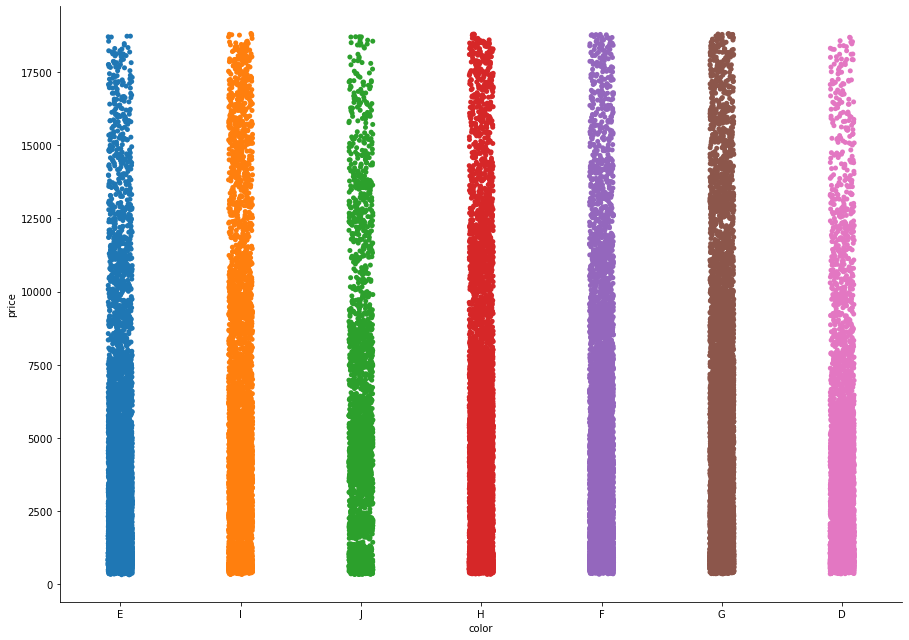

In [21]:
sns.catplot(x = 'color',y = 'price',data = df,height = 9,aspect = 11.7/8.27,ax = ax[i]);

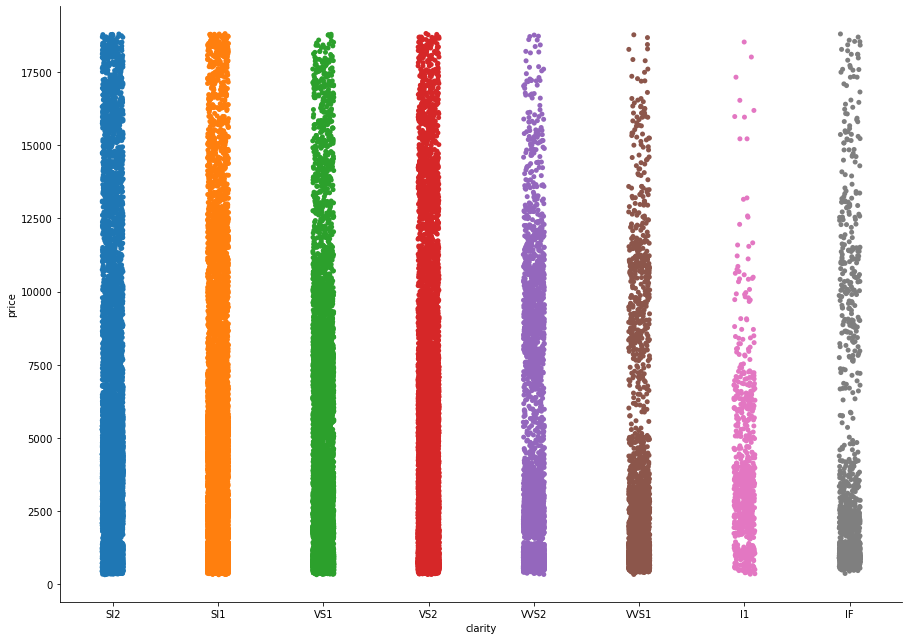

In [22]:
sns.catplot(x = 'clarity',y = 'price',data = df,height = 9,aspect = 11.7/8.27,ax = ax[i]);

Points to be noted : 

    1. In 'cut' category, the categories 'ideal','premium' and 'very good' have diamonds in every price range, while the other categories have very few samples in higher price range.
    2. In 'color' category, all categories have samples in every price range
    3. In 'clarity' category, except 'I1', 'WS2','WS1 and 'IF' posses the same property.
    4. These plots give only a hint at their correlation with price.

Let's compare one category w.r.t. another and see what kind of results we get.

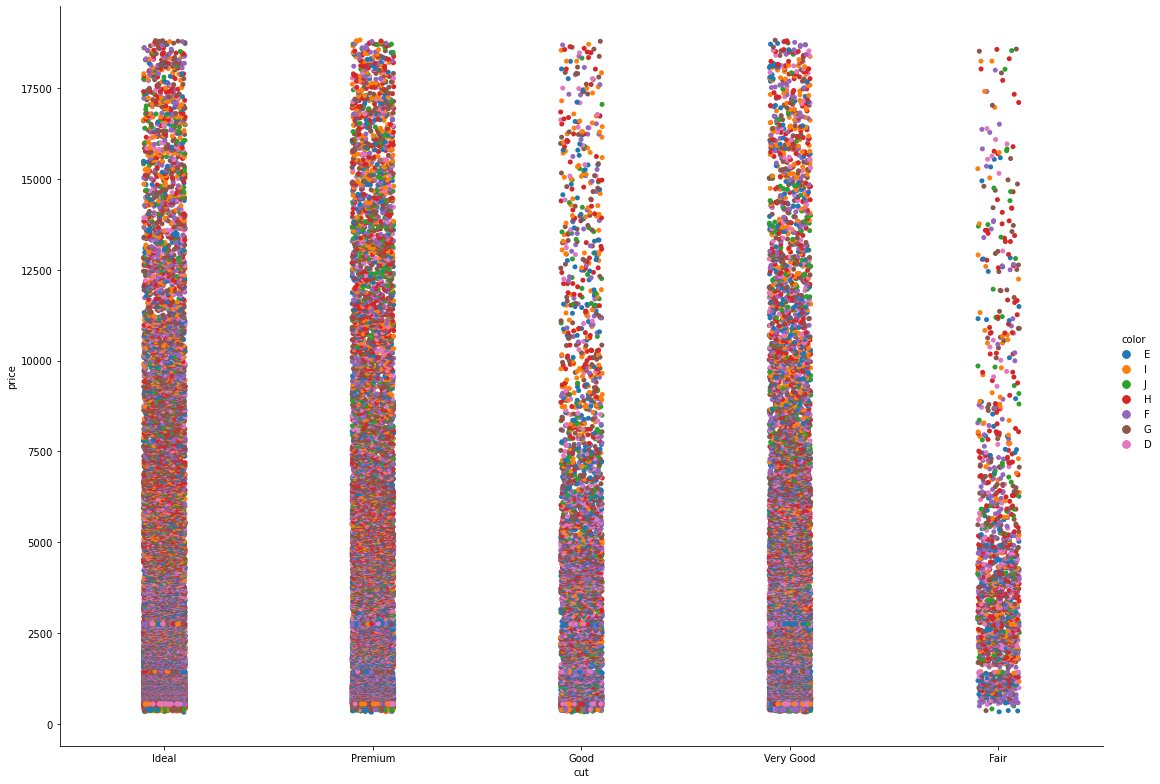

In [23]:
# Relation b/w price and cut w.r.t colour
sns.catplot(x = 'cut',y = 'price',data = df,height = 11,aspect = 11.7/8.27,hue = 'color');

Points to be noted:
    
    1. Colours 'I','G' and 'H' are found in each 'cut'.
    2. Colour 'E' and 'J' are not prevalent in higher price range.
    3. Colour 'D' is found in low to mid range.
    4. All cuts have all colours in them.

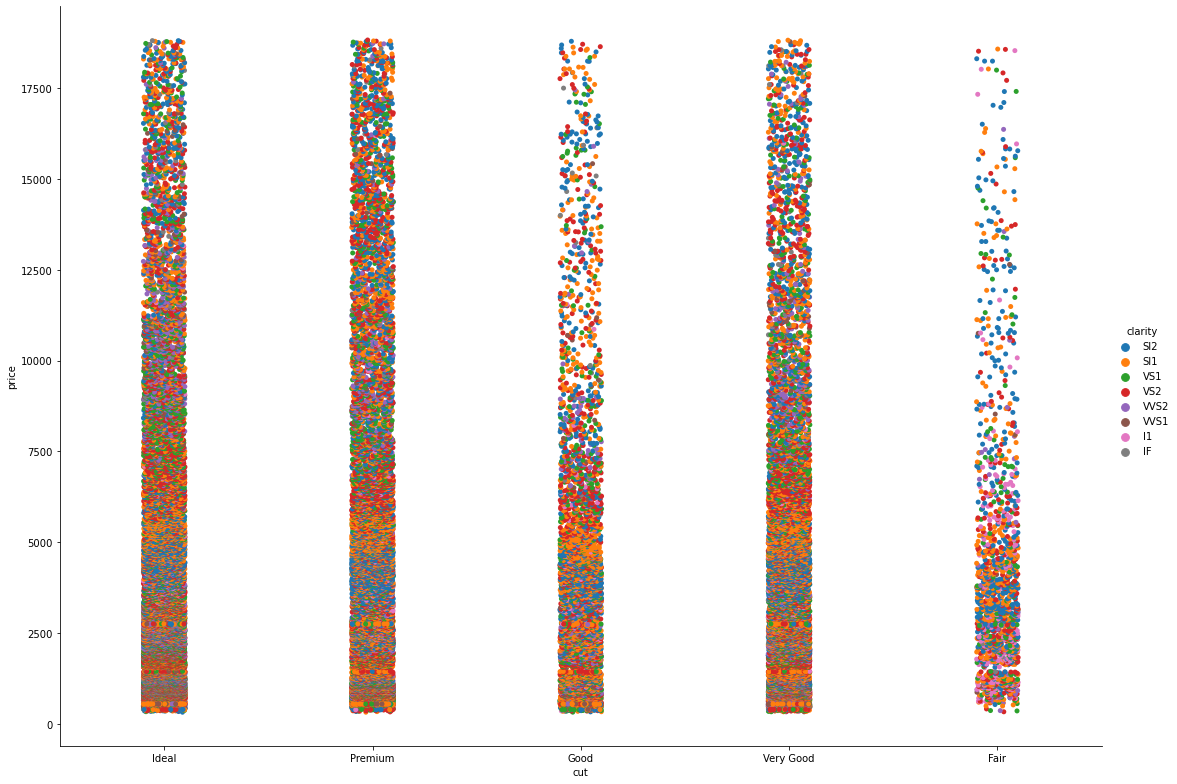

In [24]:
# Relation b/w price and clarity w.r.t. colour
sns.catplot(x = 'cut',y = 'price',hue = 'clarity',data = df,height = 11, aspect = 11.7/8.27);

Points to be noted:
    
    1. The clarity categories 'S1','S2','VS1' and 'VS2' are present in all cuts.
    2. The rest are present in low to mid range.
    3. All cut have all types of clarity in them.

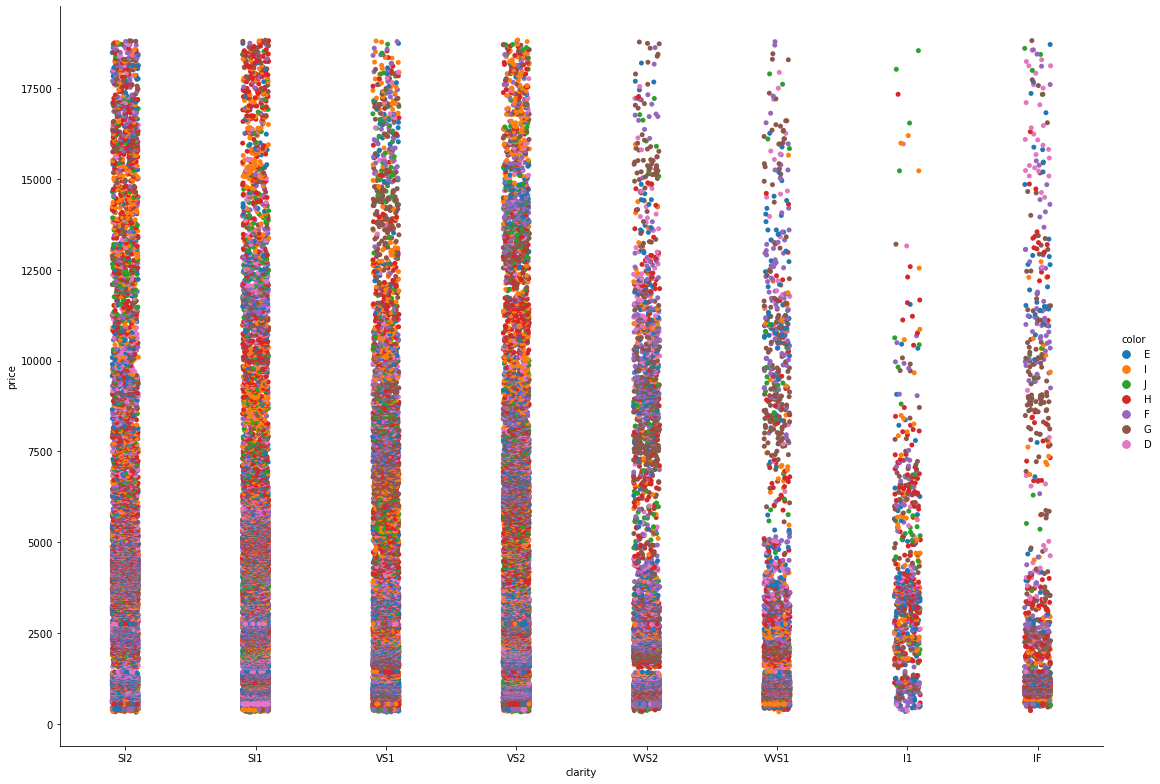

In [25]:
# Relation b/w price and clarity w.r.t. colour
sns.catplot(x = 'clarity',y = 'price', hue = 'color',data = df,height = 11, aspect = 11.7/8.27);

Points :
    
    1. In 'clarity' types 'SI1','SI2','VS1' and 'VS2' have colour 'I' dominating in the higher price range.
    2. The colour 'G' is mid range in the above mentioned types, but is high range in 'WS1' amd 'WS2'.
    3. The colour 'F' is present in all price ranges and clarity types.
    4. The colour 'H' is high range in 'SI1', 'SI2' and 'VS2'.

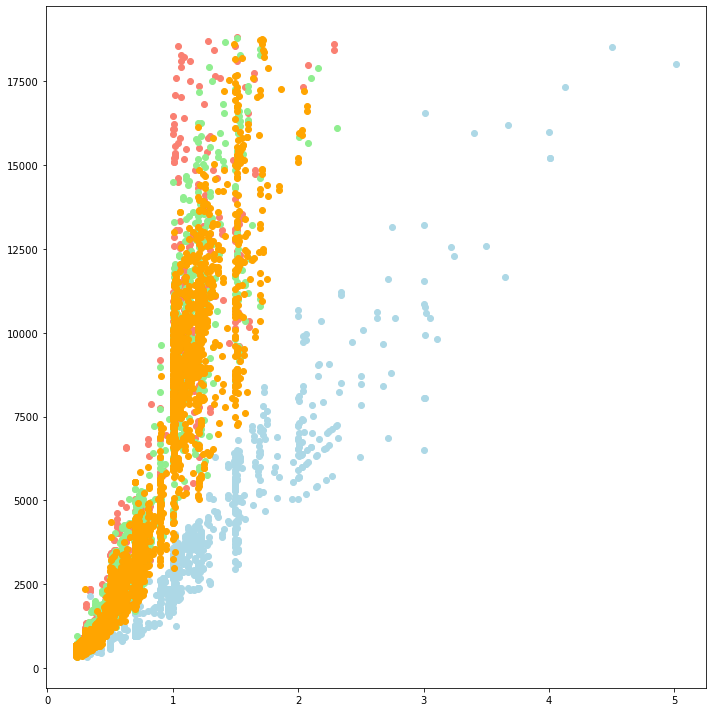

In [26]:
# Plotting price and carat w.r.t. categories ('IF','I1','VVS1','VVS2')
fig,ax = plt.subplots(figsize = (10,10),tight_layout = True)
ax.scatter(df.carat[df.clarity == 'IF'],df.price[df.clarity == 'IF'],color = 'salmon')
ax.scatter(df.carat[df.clarity == 'I1'],df.price[df.clarity == 'I1'],color = 'lightblue')
ax.scatter(df.carat[df.clarity == 'VVS1'],df.price[df.clarity == 'VVS1'],color = 'lightgreen')
ax.scatter(df.carat[df.clarity == 'VVS2'],df.price[df.clarity == 'VVS2'],color = 'orange');

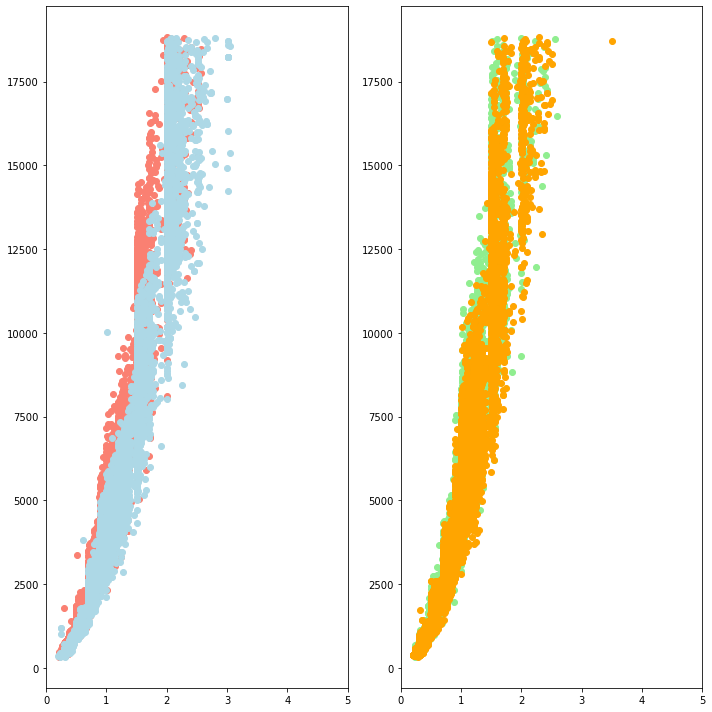

In [27]:
# Plotting for remaining categories of clarity
fig,ax = plt.subplots(1,2,figsize = (10,10),tight_layout = True)
cl1 = ['SI1','SI2','VS1','VS2']
clr = ['salmon','lightblue','lightgreen','orange']
for i in range(4):
    if i < 2:
        ax[0].scatter(df.carat[df['clarity']==cl1[i]],df.price[df['clarity']==cl1[i]],color = clr[i])
        ax[0].set_xticks(range(6))
    else:
        ax[1].scatter(df.carat[df['clarity']==cl1[i]],df.price[df['clarity']==cl1[i]],color = clr[i])
        ax[1].set_xticks(range(6));

These plots show that these 4 categories are having high correlation with price.

Points : 
    
    1. The categories 'IF','I1' and 'VVS2' have high impact on price of diamond, as the slope is greater.
    2. The category 'VVS1' has almost a linear relation with price.
    3. The categories other than that mentioned in above points have higher range of price.
    
Hence, the clarity categories in point 1 are indicators of higher price.

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']


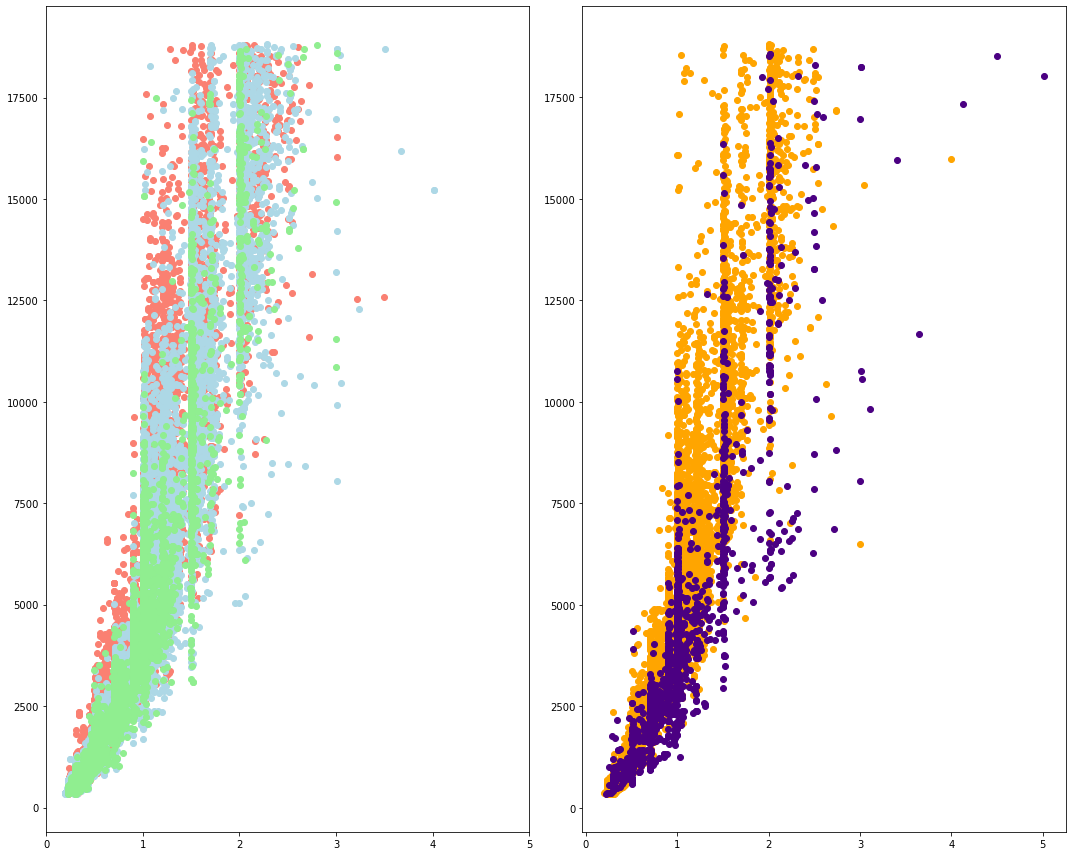

In [28]:
# Relation of price and carat w.r.t cut types ('Ideal','Premium','Very Good') and ('Good cut','Fair') in separate plots
fig,ax = plt.subplots(1,2,figsize = (15,12),tight_layout = True)
ct1 = df['cut'].unique()
clr = ['salmon','lightblue','lightgreen','orange','indigo']
print(ct1)
for i in range(5):
    if i < 3:
        ax[0].scatter(df.carat[df['cut']==ct1[i]],df.price[df['cut']==ct1[i]],color = clr[i])
        ax[0].set_xticks(range(6))
    else:
        ax[1].scatter(df.carat[df['cut']==ct1[i]],df.price[df['cut']==ct1[i]],color = clr[i])
        ax[1].set_xticks(range(6));

Clearly we can see that cuts ('Ideal','Premium','Very Good') have higher price for lower carats. Hence, such diamonds will be more expensive.

['E' 'I' 'J' 'H' 'F' 'G' 'D']


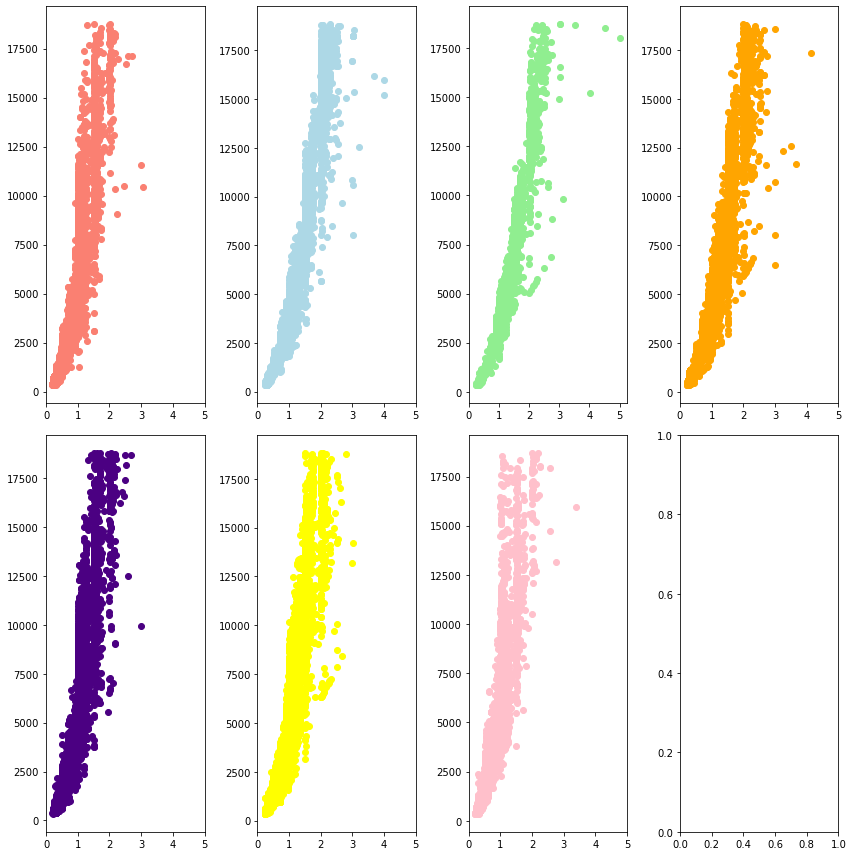

In [29]:
# Relation b/w carat and price w.r.t. different colors
fig,(ax0,ax1) = plt.subplots(2,4,tight_layout = True,figsize = (12,12))
print(df.color.unique())
clr = ['salmon','lightblue','lightgreen','orange','indigo','yellow','pink']
for i in range(7):
    if i < 4:
        ax0[i].scatter(df.carat[df.color == df.color.unique()[i]],df.price[df.color == df.color.unique()[i]],color = clr[i])
        ax0[i].set_xticks(range(6))
    else:
        ax1[i-4].scatter(df.carat[df.color == df.color.unique()[i]],df.price[df.color == df.color.unique()[i]],color = clr[i])
        ax1[i-4].set_xticks(range(6));

These plots show that for all colours are showing almost same correlation b/w price and carat. Hence we can see that there are same patterns of prices for different colours.

### Conclusion
The information obtained about the data after all visualizations are : 

    1. Carat has high correlation with price, so does the dimension.
    2. Depth and table have values in the same range for all carats and prices, hence have relatively low correlation.
    3. Depth and table are dependent on dimensions as mentioned earlier in description, and they have values in specific ranges, hence they do not impact dimensions.
    4. The clarity 'VVS2' has lower correlation to price than other clarity types.
    5. The 'Fair' has lower price than other cuts.
    6. The price and color correlation is almost the same for all color types.

At last, let's make a correlation matrix to check whether our observations are correct or not(only for numeric data).

In [30]:
# Drawing correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap = "winter").set_precision(2)

,carat,depth,table,price,x,y,z
carat,1.00,0.03,0.18,0.92,0.98,0.95,0.95
depth,0.03,1.00,-0.30,-0.01,-0.03,-0.03,0.09
table,0.18,-0.30,1.00,0.13,0.20,0.18,0.15
price,0.92,-0.01,0.13,1.00,0.88,0.87,0.86
x,0.98,-0.03,0.20,0.88,1.00,0.97,0.97
y,0.95,-0.03,0.18,0.87,0.97,1.00,0.95
z,0.95,0.09,0.15,0.86,0.97,0.95,1.00


The correlation matrix show : 
    
    1. The dimensions and carat values have high correlation with price(almost linear).
    2. Depth and table have low correlation with every other feature.
    
Hence, the data analysis was quite on point.

# 5. Modelling 
Since we have a lot samples in our dataset, we must use a small yet significant portion of the data to see the training results, as large number of samples take a lot of time to train. For training, let's take 10% of total samples. This much sample will ensure that the model trains on enough data and it will also save our time.

In [31]:
# Taking 10% random samples from main dataset for training 
np.random.seed(42)
train = df.sample(frac = 0.1)
train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1388,0.24,Ideal,G,VVS1,62.1,56.0,559,3.97,4.00,2.47
50052,0.58,Very Good,F,VVS2,60.0,57.0,2201,5.44,5.42,3.26
41645,0.40,Ideal,E,VVS2,62.1,55.0,1238,4.76,4.74,2.95
42377,0.43,Premium,E,VVS2,60.8,57.0,1304,4.92,4.89,2.98
17244,1.55,Ideal,E,SI2,62.3,55.0,6901,7.44,7.37,4.61


In [32]:
# Some information about the subset
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5394 entries, 1388 to 36225
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    5394 non-null   float64
 1   cut      5394 non-null   object 
 2   color    5394 non-null   object 
 3   clarity  5394 non-null   object 
 4   depth    5394 non-null   float64
 5   table    5394 non-null   float64
 6   price    5394 non-null   int64  
 7   x        5394 non-null   float64
 8   y        5394 non-null   float64
 9   z        5394 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 463.5+ KB


We now have 5394 samples, hence it would be easy and time saving for us to train the model. Also, the rows are selected randomly, so the patterns in the original dataset can be easily found here.

In [33]:
# Splitting into features and label
X = train.drop('price',axis = 1)
y = train['price']

In [34]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
1388,0.24,Ideal,G,VVS1,62.1,56.0,3.97,4.00,2.47
50052,0.58,Very Good,F,VVS2,60.0,57.0,5.44,5.42,3.26
41645,0.40,Ideal,E,VVS2,62.1,55.0,4.76,4.74,2.95
42377,0.43,Premium,E,VVS2,60.8,57.0,4.92,4.89,2.98
17244,1.55,Ideal,E,SI2,62.3,55.0,7.44,7.37,4.61


In [35]:
y.head()

1388      559
50052    2201
41645    1238
42377    1304
17244    6901
Name: price, dtype: int64

Since we have categorical features, we need to convert them into numeric features. Let's use one hot encoding to do this.

In [36]:
# One hot encoding data
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
column = make_column_transformer((OneHotEncoder(drop = 'if_binary',sparse = False),['cut','color','clarity']),remainder = 'passthrough')
column.fit_transform(X)

array([[0.  , 0.  , 1.  , ..., 3.97, 4.  , 2.47],
       [0.  , 0.  , 0.  , ..., 5.44, 5.42, 3.26],
       [0.  , 0.  , 1.  , ..., 4.76, 4.74, 2.95],
       ...,
       [0.  , 0.  , 1.  , ..., 5.18, 5.16, 3.19],
       [0.  , 0.  , 1.  , ..., 4.35, 4.38, 2.73],
       [0.  , 0.  , 0.  , ..., 4.51, 4.56, 2.7 ]])

In [37]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
1388,0.24,Ideal,G,VVS1,62.1,56.0,3.97,4.00,2.47
50052,0.58,Very Good,F,VVS2,60.0,57.0,5.44,5.42,3.26
41645,0.40,Ideal,E,VVS2,62.1,55.0,4.76,4.74,2.95
42377,0.43,Premium,E,VVS2,60.8,57.0,4.92,4.89,2.98
17244,1.55,Ideal,E,SI2,62.3,55.0,7.44,7.37,4.61


Now, we have made column transformer, let's now split the data into training and test set.

In [38]:
# Splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [39]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4315, 9), (1079, 9), (4315,), (1079,))

The data is now split into training and test set. Let's start modelling.

Since it is a regression problem, hence we will start from Ridge regression model.

In [40]:
# Making pipeline function to model using different models and evaluating them
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import matplotlib.ticker as ticker
def pipeline(model,X_train,y_train,X_test,y_test):
    pipe = make_pipeline(column,model)
    pipe.fit(X_train,y_train)
    # Evaluating metrics on training and test set
    train_predict = pipe.predict(X_train)
    test_predict = pipe.predict(X_test)
    scores = {
        "Training R^2 score" : r2_score(y_train,train_predict),
        "Test R^2 score" : r2_score(y_test,test_predict),
        "Training MAE" : mean_absolute_error(y_train,train_predict),
        "Test MAE" : mean_absolute_error(y_train,train_predict),
        "Training MSE" : mean_squared_error(y_train,train_predict),
        "Test MSE" : mean_squared_error(y_test,test_predict)
    }
    print(scores)
    fig,ax = plt.subplots(1,3,tight_layout = True,figsize = (9,9))
    ax[0].bar(['Training','Test'],[r2_score(y_train,train_predict),r2_score(y_test,test_predict)],color = 'lightblue')
    ax[0].set_title('R^2 score')
    ax[1].bar(['Training','Test'],[mean_absolute_error(y_train,train_predict),mean_absolute_error(y_train,train_predict)],color = 'lightblue')
    ax[1].set_title('MAE')
    ax[2].bar(['Training','Test'],[mean_squared_error(y_train,train_predict),mean_squared_error(y_test,test_predict)],color = 'lightblue');
    ax[2].set_title('MSE');
    return pipe

{'Training R^2 score': 0.9263287615129692, 'Test R^2 score': 0.8876675718240812, 'Training MAE': 722.609143484681, 'Test MAE': 722.609143484681, 'Training MSE': 1207312.1171969285, 'Test MSE': 1703762.578811322}


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('ridge', Ridge())])

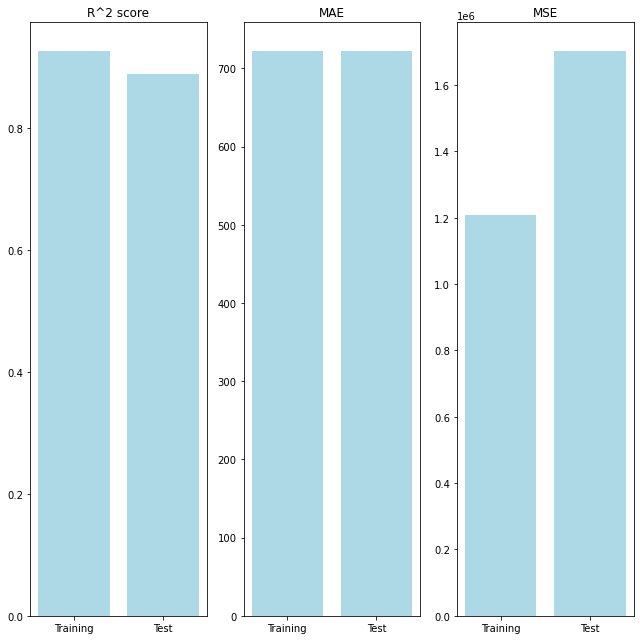

In [41]:
from sklearn.linear_model import Ridge
ridge = Ridge()
pipeline(ridge,X_train,y_train,X_test,y_test)

Although the R^2 score is coming high, the MAE and MSE values are coming very large, which is due to large difference in maximum and minimum values. Let's delete some features and run the model again.

We have seen that the 'depth' and 'table' values have very less significance, let's remove them and train the model again. 

In [42]:
# Removing 'depth' and 'table' from main dataset
X1 =X.drop(['depth','table'],axis = 1)
X1.head()

,carat,cut,color,clarity,x,y,z
1388,0.24,Ideal,G,VVS1,3.97,4.00,2.47
50052,0.58,Very Good,F,VVS2,5.44,5.42,3.26
41645,0.40,Ideal,E,VVS2,4.76,4.74,2.95
42377,0.43,Premium,E,VVS2,4.92,4.89,2.98
17244,1.55,Ideal,E,SI2,7.44,7.37,4.61


{'Training R^2 score': 0.9207036551088348, 'Test R^2 score': 0.9123727798180132, 'Training MAE': 741.0767094132195, 'Test MAE': 741.0767094132195, 'Training MSE': 1293700.4829599683, 'Test MSE': 1355693.0429015295}


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('ridge', Ridge())])

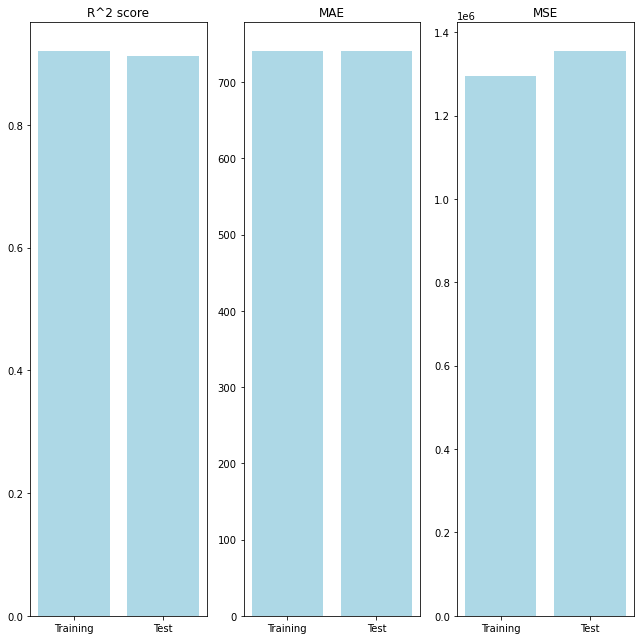

In [43]:
# Training model on modified data
np.random.seed(42)
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y,test_size = 0.2)
pipeline(ridge,X1_train,y1_train,X1_test,y1_test)

In genral, training metrics have worsened but test metrics have really improved. Let's see what features we can modify and see what results we can see.

{'Training R^2 score': 0.9208995384065274, 'Test R^2 score': 0.9125646586267668, 'Training MAE': 738.9395731737272, 'Test MAE': 738.9395731737272, 'Training MSE': 1290504.6948416573, 'Test MSE': 1352724.4588751602}


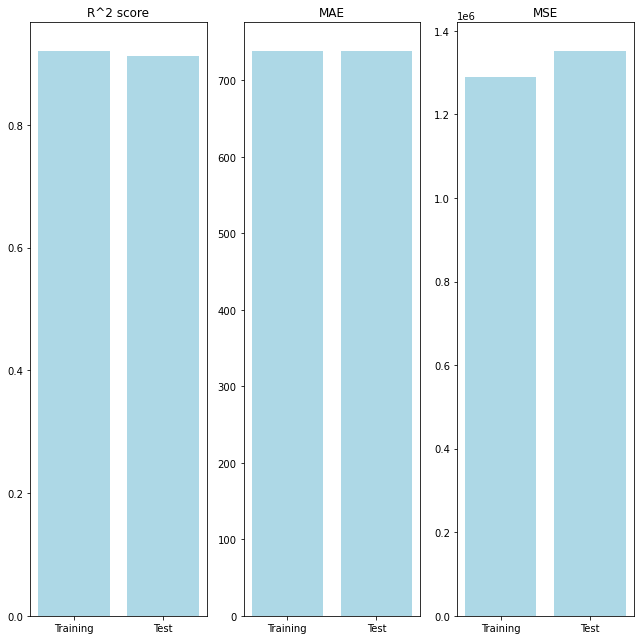

In [44]:
# Dropping some potential outliers
X2 = X.drop(X[(X.x<3) & (X.y>20) & (X.z >15)].index)
np.random.seed(42)
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y,test_size = 0.2)
pipeline(ridge,X2_train,y2_train,X2_test,y2_test);

The model seems to reach its maximum performance. Let's try another model and see the results.

{'Training R^2 score': 0.9264019625192625, 'Test R^2 score': 0.8858910760584046, 'Training MAE': 720.4614716106605, 'Test MAE': 720.4614716106605, 'Training MSE': 1206112.5111674392, 'Test MSE': 1730706.953255329}


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('linearregression', LinearRegression())])

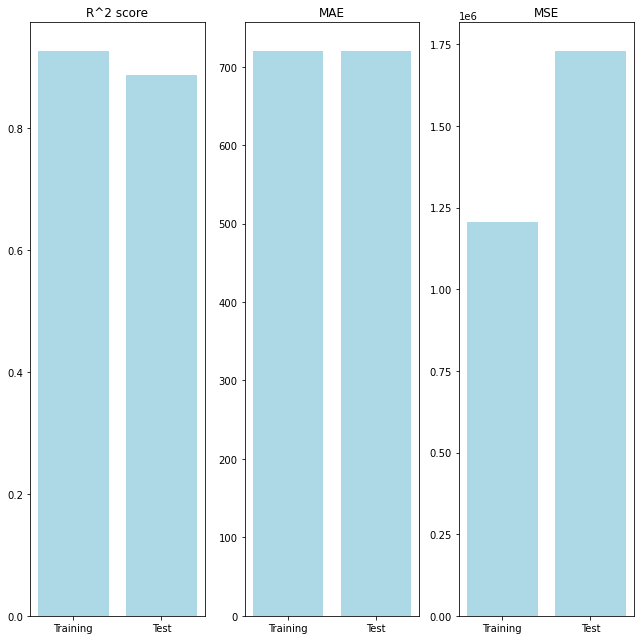

In [45]:
# Using LinearRegression model
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
pipeline(linear,X_train,y_train,X_test,y_test)

The LinearRegression() model is performing better on training set and worse in test set, let's train it on the data not having 'depth' and 'table' features.

{'Training R^2 score': 0.9207611421423856, 'Test R^2 score': 0.9119096438533614, 'Training MAE': 739.0132097334879, 'Test MAE': 739.0132097334879, 'Training MSE': 1292762.5960602548, 'Test MSE': 1362858.2845227062}


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('linearregression', LinearRegression())])

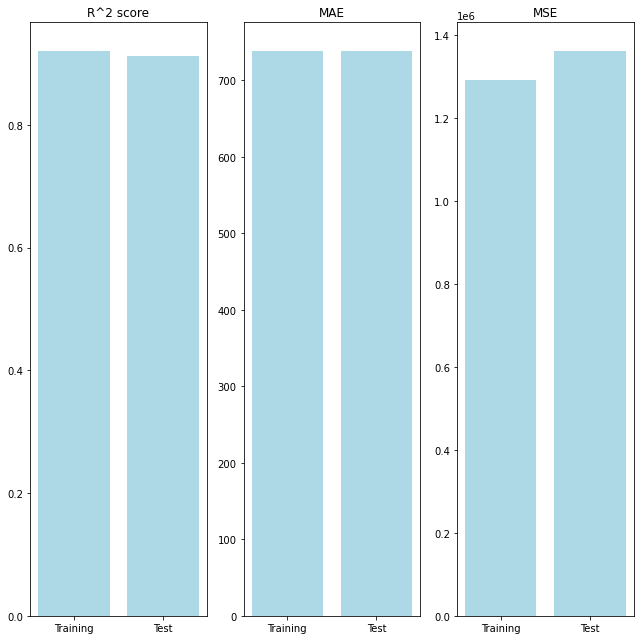

In [46]:
pipeline(linear,X1_train,y1_train,X1_test,y1_test)

The training metrics have very small change, but the test metrics have improved.

Let's train the model on the data which doesn't have some outliers.

{'Training R^2 score': 0.9209586391009044, 'Test R^2 score': 0.9121584592701985, 'Training MAE': 736.9712630359212, 'Test MAE': 736.9712630359212, 'Training MSE': 1289540.4814600232, 'Test MSE': 1359008.8262279888}


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('linearregression', LinearRegression())])

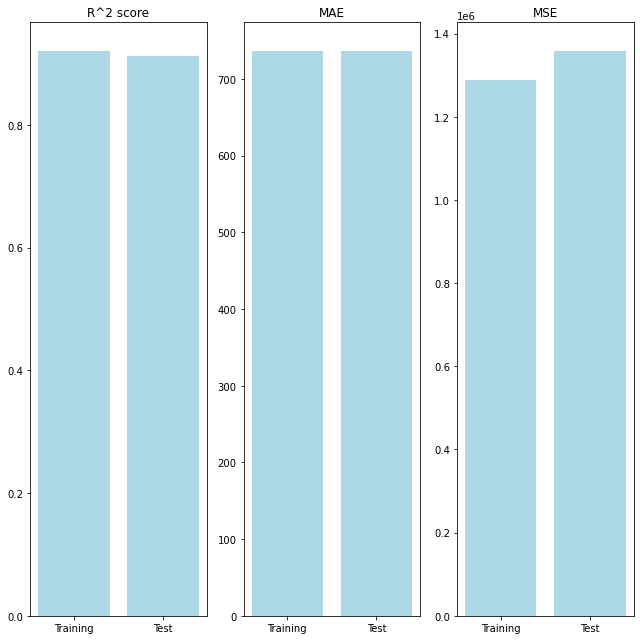

In [47]:
pipeline(linear,X2_train,y2_train,X2_test,y2_test)

Let's modify some more features and see what results are in front of us.

Earlier we saw that the 'Fair' cut diamonds have lower price to carat relation. Let's remove that feature and see what happens.

{'Training R^2 score': 0.9211376602032513, 'Test R^2 score': 0.9219237583957571, 'Training MAE': 716.0683846430283, 'Test MAE': 716.0683846430283, 'Training MSE': 1256055.097636597, 'Test MSE': 1394876.554324563}


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('linearregression', LinearRegression())])

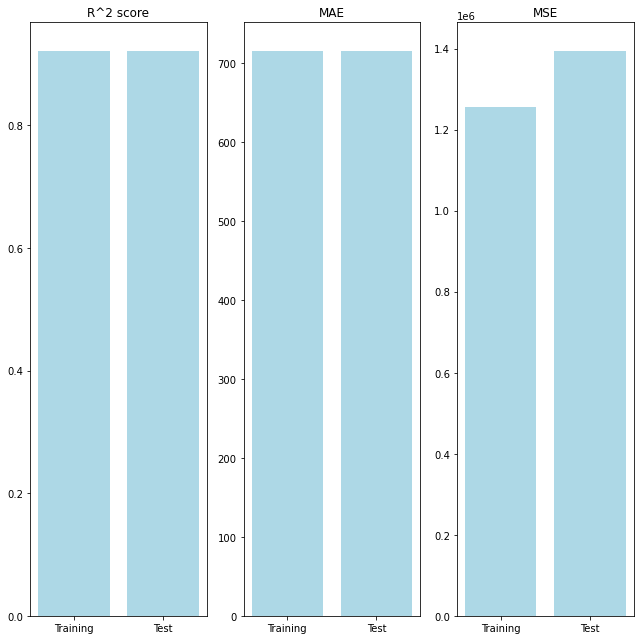

In [48]:
train1 = train
train1.drop(train1[train1.cut == 'Fair'].index,inplace = True)
np.random.seed(42)
X3 = train1.drop('price',axis = 1)
y3 = train1['price']
X3_train,X3_test,y3_train,y3_test = train_test_split(X3,y3,test_size = 0.2)
pipeline(linear,X3_train,y3_train,X3_test,y3_test)

Except MSE on test set, all other metrics have improved significantly.

{'Training R^2 score': 0.9210693950579331, 'Test R^2 score': 0.9210966197672805, 'Training MAE': 719.1806137011918, 'Test MAE': 719.1806137011918, 'Training MSE': 1257142.3692543139, 'Test MSE': 1409653.857334184}


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('ridge', Ridge())])

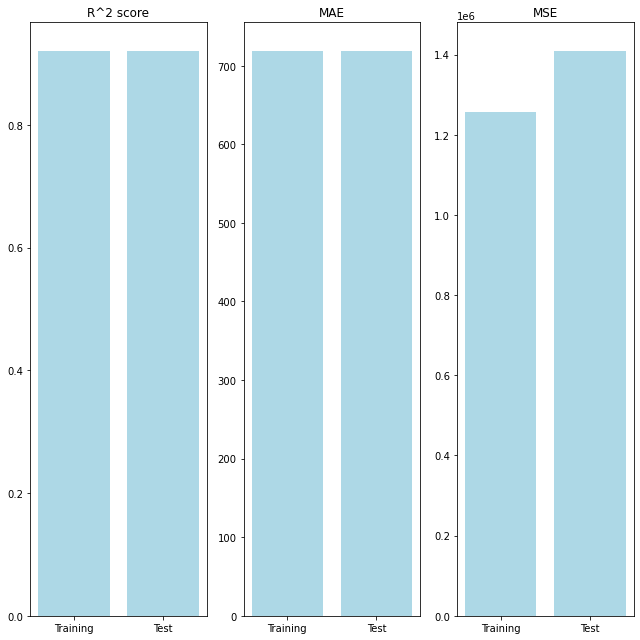

In [49]:
# Training with Ridge() model
pipeline(ridge,X3_train,y3_train,X3_test,y3_test)

In the Ridge() model, R^2 score on both sets remain somewhat the same, with MAE and MSE on both sets worsening.

{'Training R^2 score': 0.9210693950579331, 'Test R^2 score': 0.9210966197672805, 'Training MAE': 719.1806137011918, 'Test MAE': 719.1806137011918, 'Training MSE': 1257142.3692543139, 'Test MSE': 1409653.857334184}


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('ridge', Ridge())])

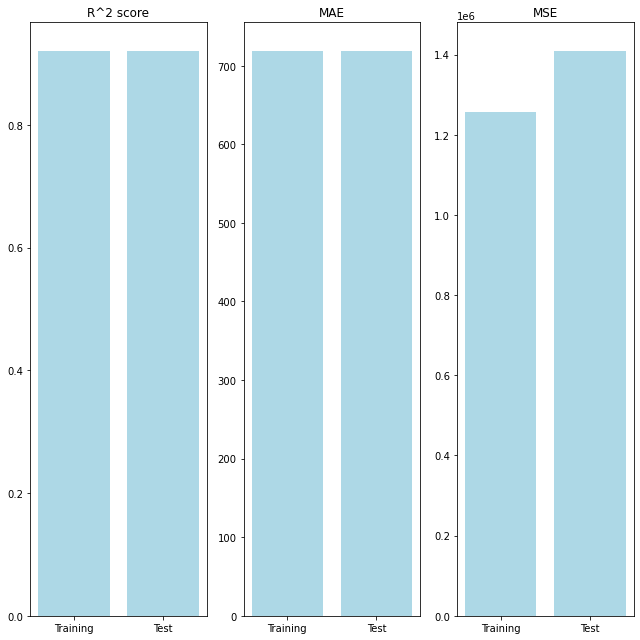

In [50]:
# Let's remove 'color' columns, as we saw all colours have same correlation with price and carat
train2 = train1
train2.drop('color',axis = 1)
X4 = train2.drop('price',axis = 1)
y4 = train2['price']
np.random.seed(42)
X4_train,X4_test,y4_train,y4_test = train_test_split(X4,y4,test_size = 0.2)
pipeline(ridge,X4_train,y4_train,X4_test,y4_test)

In this case also, R^2 score remains the same, but the MAE and MSE are worsening.

{'Training R^2 score': 0.9211376602032513, 'Test R^2 score': 0.9219237583957571, 'Training MAE': 716.0683846430283, 'Test MAE': 716.0683846430283, 'Training MSE': 1256055.097636597, 'Test MSE': 1394876.554324563}


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('linearregression', LinearRegression())])

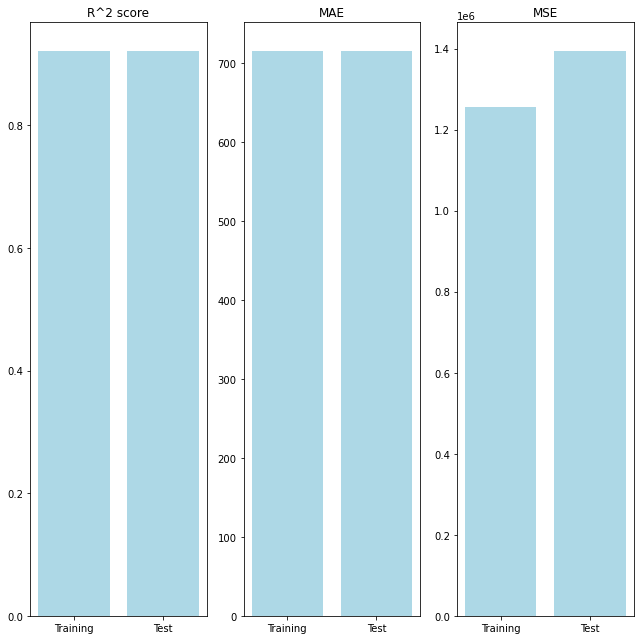

In [51]:
# Training on LinearRegression() model
pipeline(linear,X4_train,y4_train,X4_test,y4_test)

The LinaerRegression() model performs a bit better than the Ridge model, but still it is worse than that in previous cases.

Let's remove the clarity 'VVS2' as it was seen to have low correlation.

{'Training R^2 score': 0.9206584297042435, 'Test R^2 score': 0.9268963901126818, 'Training MAE': 727.0043560505834, 'Test MAE': 727.0043560505834, 'Training MSE': 1298432.382666684, 'Test MSE': 1274137.1590080815}


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('ridge', Ridge())])

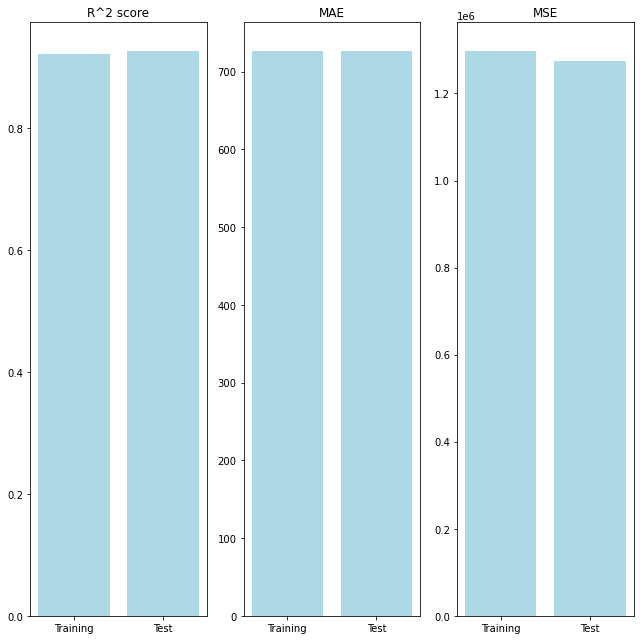

In [52]:
train3 = train2
train3.drop(train3[train3.clarity == 'VVS2'].index,inplace = True)
X5 = train3.drop('price',axis = 1)
y5 = train3.price
np.random.seed(42)
X5_train,X5_test,y5_train,y5_test = train_test_split(X5,y5,test_size = 0.2)
pipeline(ridge,X5_train,y5_train,X5_test,y5_test)

The R^2 score remains somewhat the same, MAE has worsened and MSE has improved significantly.

{'Training R^2 score': 0.9207481524598212, 'Test R^2 score': 0.9273197410800705, 'Training MAE': 723.1592411422528, 'Test MAE': 723.1592411422528, 'Training MSE': 1296964.0611944739, 'Test MSE': 1266758.4919397463}


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('linearregression', LinearRegression())])

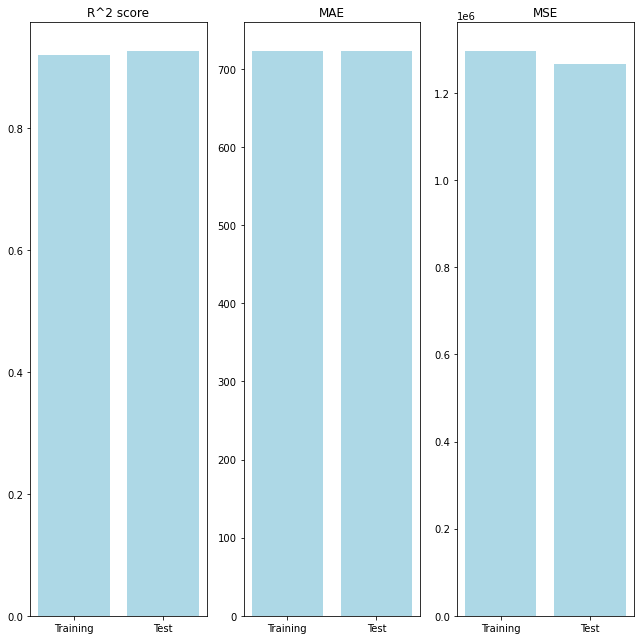

In [53]:
# Using LinearRegression() model
pipeline(linear,X5_train,y5_train,X5_test,y5_test)

This model's R^2 improved a bit, MAE and MSE has improved from previous case.

Let's use a different model and see what results it shows.

{'Training R^2 score': 0.9959267239537126, 'Test R^2 score': 0.9680546724310065, 'Training MAE': 131.87917489929924, 'Test MAE': 131.87917489929924, 'Training MSE': 66752.1766752503, 'Test MSE': 484519.5155461665}


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('randomforestregressor', RandomForestRegressor())])

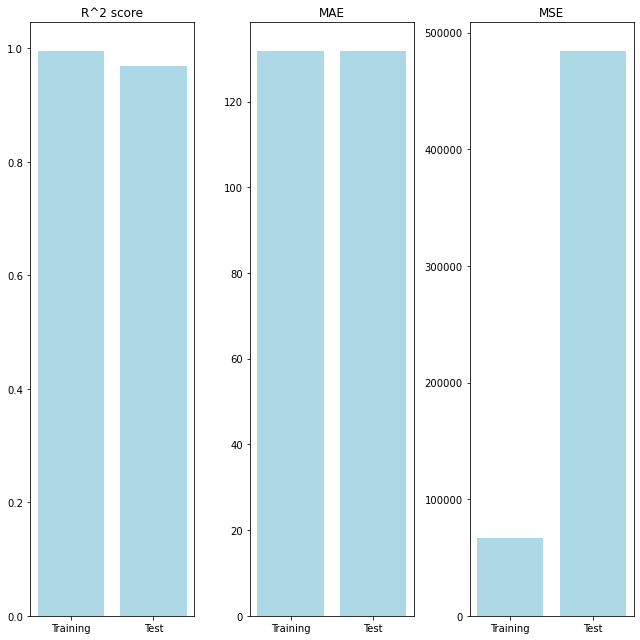

In [54]:
# Using RandomForestRegressor() model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
pipeline(forest,X_train,y_train,X_test,y_test)

The metrics have significantly improved from the previous two models. Let's see how it performs on modified data


{'Training R^2 score': 0.9961299793620779, 'Test R^2 score': 0.9703928456877082, 'Training MAE': 127.44591622799756, 'Test MAE': 127.44591622799756, 'Training MSE': 63138.440683697896, 'Test MSE': 458056.44682012853}


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('randomforestregressor', RandomForestRegressor())])

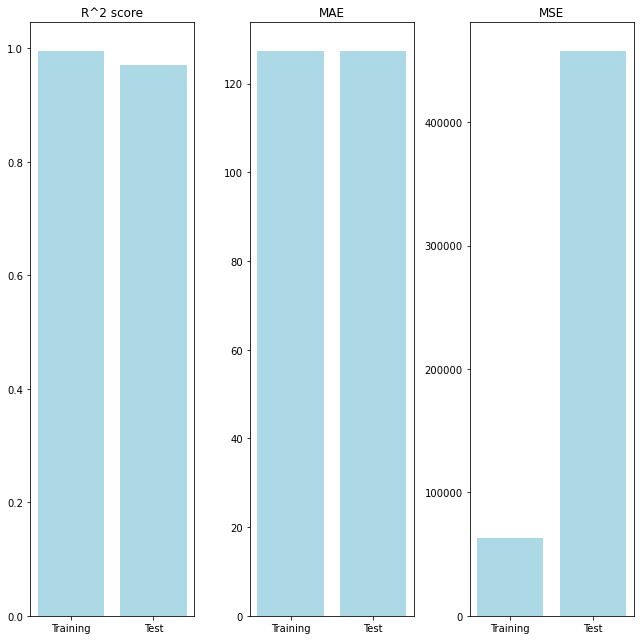

In [55]:
# Using RandomForestRegressor() on data not having 'depth' and 'table'
pipeline(forest,X1_train,y1_train,X1_test,y1_test)

The metrics are keeping on improving, although the metrics may seem to show overfitting. Let's train it on more data.

{'Training R^2 score': 0.9954428035912193, 'Test R^2 score': 0.9728948135079526, 'Training MAE': 132.94691902252035, 'Test MAE': 132.94691902252035, 'Training MSE': 72583.31156459266, 'Test MSE': 484249.60476449534}


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('randomforestregressor', RandomForestRegressor())])

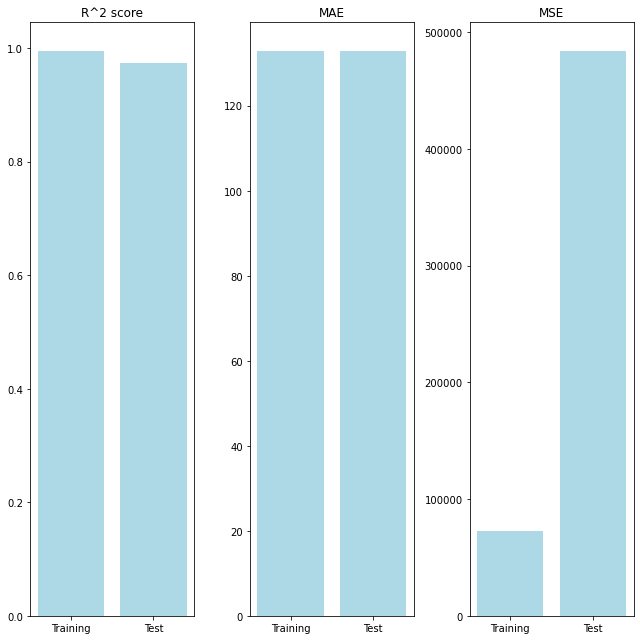

In [56]:
# Training on data not having 'Fair' cut 
pipeline(forest,X3_train,y3_train,X3_test,y3_test)

Except R^2, other metrics are worsening a bit. Let's try it another set of modified data

{'Training R^2 score': 0.995546589572773, 'Test R^2 score': 0.9724844495228885, 'Training MAE': 131.62155282702443, 'Test MAE': 131.62155282702443, 'Training MSE': 70930.29300681586, 'Test MSE': 491580.9912367914}


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('randomforestregressor', RandomForestRegressor())])

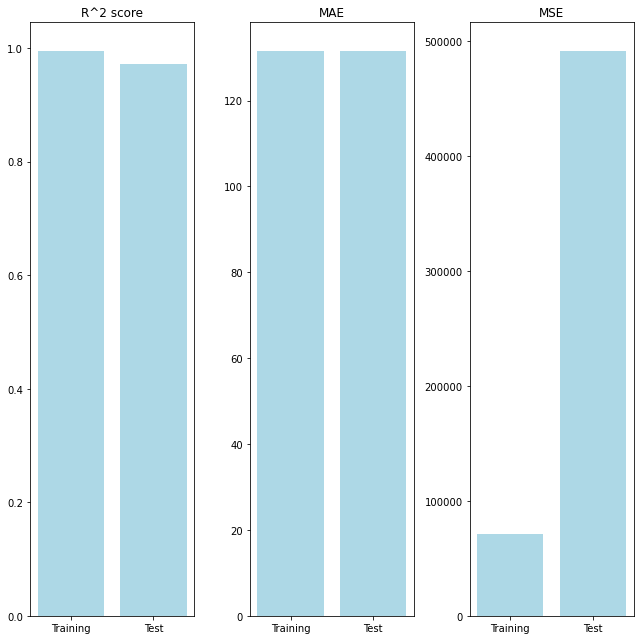

In [57]:
# Using data without color columns
pipeline(forest,X4_train,y4_train,X4_test,y4_test)

There has been a improvement in the metrics, but it is very small.

{'Training R^2 score': 0.995816060881265, 'Test R^2 score': 0.9725552435035916, 'Training MAE': 132.4571528952935, 'Test MAE': 132.4571528952935, 'Training MSE': 68470.56364804537, 'Test MSE': 478340.0453945102}


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('randomforestregressor', RandomForestRegressor())])

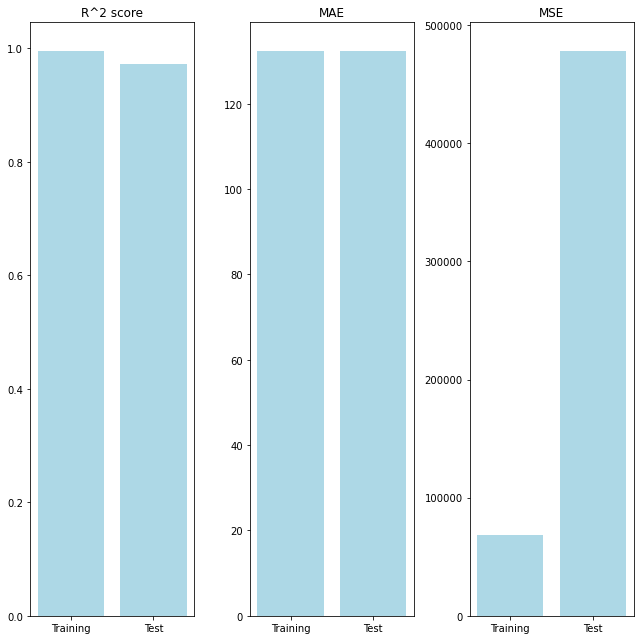

In [58]:
# Using data not having 'VVS2' clarity
pipeline(forest,X5_train,y5_train,X5_test,y5_test)

The metrics have started worsening, hence based on metrics,we should try the RandomForestRegressor() model with the data not having 'depth','table','Fair' cut and 'VVS2' clarity.

{'Training R^2 score': 0.9958042770479942, 'Test R^2 score': 0.9712936200334108, 'Training MAE': 132.8603368483124, 'Test MAE': 132.8603368483124, 'Training MSE': 68663.40720601482, 'Test MSE': 500329.1283756628}


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('randomforestregressor', RandomForestRegressor())])

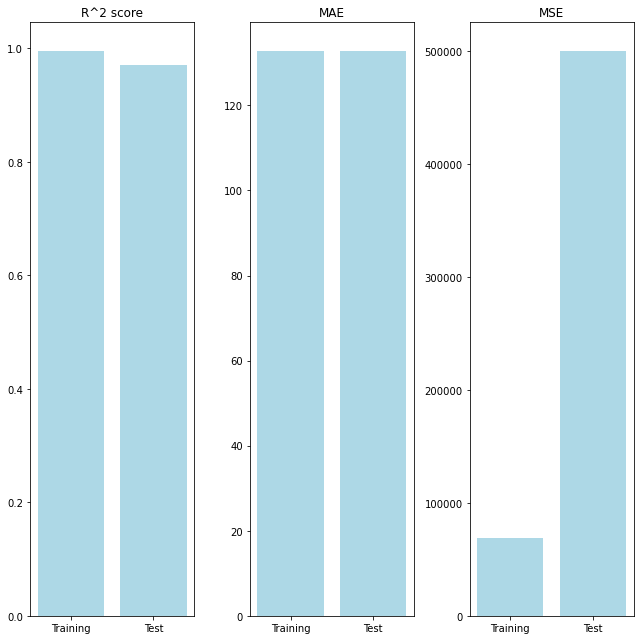

In [59]:
# Doing final modfications on data
train4 = train
train4.drop(['depth','table'],axis = 1)
train4.drop(train4[train4.cut == 'Fair'].index,inplace = True)
train4.drop(train4[train4.clarity == 'VVS2'].index,inplace = True)
X6 = train4.drop('price',axis = 1)
y6 = train4.price
np.random.seed(42)
X6_train,X6_test,y6_train,y6_test = train_test_split(X6,y6,test_size = 0.2)
pipeline(forest,X6_train,y6_train,X6_test,y6_test)

After all data munging, the model seems to not improve from the result we have seen after removing 'depth' and 'table' feature. Hence, we should stick with doing only that change in the final dataset.

In [60]:
train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1388,0.24,Ideal,G,VVS1,62.1,56.0,559,3.97,4.00,2.47
17244,1.55,Ideal,E,SI2,62.3,55.0,6901,7.44,7.37,4.61
46398,0.51,Ideal,F,VS1,60.2,56.0,1765,5.22,5.24,3.15
45493,0.52,Ideal,D,VS2,62.0,56.0,1679,5.17,5.19,3.21
49385,0.62,Premium,E,VS2,60.0,59.0,2102,5.58,5.56,3.34


In [61]:
# Cross validation final selected model
train.drop(['depth','table'],axis = 1,inplace = True)
X = train.drop('price',axis  = 1)
y = train.price
pipe = make_pipeline(column,forest)
from sklearn.model_selection import cross_val_score
cross_val_score(pipe,X,y).mean()

0.9710635948129331

Even in cross validation, the model seems to perfrom a lot better than expected. This may be possible due to:
    
    1. Large number of samples to train on.
    2. Removing features which have very low correlation.
    
Let's see the cross validation score for MAE and MSE.

In [62]:
# Cross validation for MAE and MSE
print(abs(cross_val_score(pipe,X,y,scoring = 'neg_mean_absolute_error').mean()))
print(abs(cross_val_score(pipe,X,y,scoring = 'neg_mean_squared_error').mean()))

352.6617934920156
476147.20561406406


The results for MAE and MSE are worse than expected, but still better than what was seen in initial models.

### Final Modelling

Let's do modelling on now the full data. Here, we will now make three different sets, train, test and valid. Valid set will be used for cross validation, while the other two will be used for the same purpose they were used earlier.

In [63]:
# Making changes in original data
df.drop(['depth','table'],axis = 1,inplace = True)
df = df.sample(frac = 1)
train_set = df[:round(0.6*len(df))]
valid_set = df[round(0.6*len(df)):round(0.8*len(df))]
test_set = df[round(0.8*len(df)):]

In [64]:
# Shapes of different sets
train_set.shape,valid_set.shape,test_set.shape

((32364, 8), (10788, 8), (10788, 8))

Now, we have made the final split, let's start doing the final modelling process.

In [65]:
X_train = train_set.drop('price',axis = 1)
y_train = train_set.price
model = make_pipeline(column,forest)
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.9971807658848593

The model is seeming fit almost perfectly on the training data. Let's cross validate it on all 3 metrics.

In [67]:
# Cross validation
X_valid = valid_set.drop('price',axis = 1)
y_valid = valid_set.price
cross_val_score(model,X_valid,y_valid,cv = 5).mean()

0.975250213226541

The cross validation score on valid set is also very good. Let's finally calculate the metrics on the test data.

In [68]:
# Calculating metrics on test data
X_test = train_set.drop('price',axis = 1)
y_test = train_set.price
test_predict = model.predict(X_test)
scores = {
    "R^2 score" : r2_score(y_test,test_predict),
    "Mean Absolute Error" : mean_absolute_error(y_test,test_predict),
    "Mean Squared Error" : mean_squared_error(y_test,test_predict)
}
print(scores)

{'R^2 score': 0.9971807658848593, 'Mean Absolute Error': 104.94250695265953, 'Mean Squared Error': 44816.19155566062}


These metrics show that the model is fit very nicely, although the r2 score looks like it has overfitted. Let's now export the model and end the project.

In [79]:
# Exporting the model
import joblib
joblib.dump(model,"final_model.joblib")

['final_model.joblib']